# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fadilah Kurniawan Hadi
- **Email:** fadheljuan60@gmail.com
- **ID Dicoding:** MC009D5Y0882

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : **Bagaimana pola pembelian pelanggan berdasarkan frekuensi transaksi? (RFM Analysis)**
- Pertanyaan 2 : **Bagaimana distribusi pesanan berdasarkan lokasi geografis? (Geospatial Analysis)**

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from streamlit_folium import folium_static
from folium.plugins import MarkerCluster, HeatMap
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
from google.colab import drive

2025-03-09 01:10:42.378 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## Data Wrangling

### Gathering Data

In [2]:
drive.mount('/content/drive')

customers_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/customers_dataset.csv")
orders_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/orders_dataset.csv")
order_items_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/order_items_dataset.csv")
geolocation_df = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/geolocation_dataset.csv")

Mounted at /content/drive


In [3]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight GATHERING DATA(summary):**
- **Mengimport** serta **menampilkan 4 dataset** yang dibutuhkan untuk menjawab 2 pertanyaan bisnis yang saya buat
- **customers_df** (Untuk informasi pelanggan yang berisi id dan id unik pelanggan, kode pos, kota, serta negara asal pelanggan)
- **orders_dataset** (Untuk informasi transaksi seperti id order dan id pelanggan untuk menghubungkan kedua datasestnya, status ordernya dan semua informasi tentang tanggal dan waktu pembelian)
- **order_items_dataset** (Untuk informasi nilai pembelian berdasarkan item yang dibeli, harga dan ongkirnya (monetary))
- **geolocation_dataset** (Untuk analisis geografis yang memaanfaatkan beberapa faktor pendukung terhadap geolocationnya seperti langitude, longitude, kota, dan negaranya)

### Assessing Data

**1. Melihat informasi umum pada ke 4 dataset**

In [7]:
customers_df.info()
orders_df.info()
order_items_df.info()
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

**Insight:**
- Melakukan **inspeksi sederhana terkait informasi umum** yang tedapat **pada 4 dataset** tersebut (columnya apa saja yang tersedia, tipe datanya apa, perhitungan banyaknya data yang tidak null/kosong)
- Terdapat **3 fitur yang mempunyai missing value** pada dataset orders_df (pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date)

**2. Mengecek missing value, duplicated value, menampilkan descriptive statistics serta outliers pada CUSTOMER_DF**

In [8]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [9]:
customers_df.duplicated().sum()

0

**Insight:**
- **Tidak terdapat missing values** pada dataset customers_id
- **Tidak terdapat duplicated values** pada dataset customers_id
- Disini tampilan **deskriptif statistiknya tidak dibutuhkan** karena tipe data numerik hanya ada pada customer_zip_code_prefix dan juga nilai fiturnya tidak ada makna tertentu selain menginformasikan tentang kode pos
- Disini juga **tidak memerlukan pengecekaan outliers** karena fitur-fitur yang terkandung pada dataset customers_id semunya bersifat kategorikal yang hanya memberikan informasi berdasarkan kriteria tertentu (Misal kode pos 16411 = kode pos mekarjaya)

**3. Mengecek missing value, duplicated value, menampilkan descriptive statistics serta outliers pada ORDERS_DF**

In [10]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [11]:
orders_df.duplicated().sum()

0

**Insight:**
- **Terdapat missing values** pada dataset orders_id di ketiga fiturnya (tanggal order yang sudah disetujui, tanggal order sampai di local delivery hubnya dan kolom tanggal order sampai ke kita) yang mana nanti harus dilakukan pembersihan
- **Tidak terdapat duplicated** values pada dataset orders_id
- Disini **tampilan deskriptif statistiknya tidak dibutuhkan** karena tipe data semua fitur disini semuanya object
- Disini juga **tidak perlu pengecekan outliers** karena datanya bersifat object, bukan numerik

**4. Mengecek missing value, duplicated value, menampilkan descriptive statistics serta outliers pada ORDER_ITEMS_DF**

In [12]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [13]:
order_items_df.duplicated().sum()

0

In [14]:
order_items_df.drop(columns=["order_item_id"]).describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [43]:
# Mengidentifikasi outliers menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

price_outliers = detect_outliers_iqr(order_items_df, "price")
freight_outliers = detect_outliers_iqr(order_items_df, "freight_value")

print(f"Outliers in price: {price_outliers}")
print(f"Outliers in freight_value: {freight_outliers}")

Outliers in price: 8427
Outliers in freight_value: 12134


**Insight:**
- **Tidak terdapat missing values** pada dataset order_items_id
- **Tidak terdapat duplicated values** pada dataset order_items_id
- **Menampilkan deskriptif statistik** untuk melihat informasi statistik pada **fitur price dan freight value**, namun tidak dengan fitur order_item_id karena hanya berperan sebagai pemberitahu item yang dibeli
- **Mengecek outliers** karena terdapat data numerikal seperti price dan juga freight_value dan disini terdapat outlier yang harus dibersihkan

**5. Mengecek missing value, duplicated value, menampilkan descriptive statistics serta outliers pada GEOLOCATION_DF**

In [21]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [22]:
geolocation_df.duplicated().sum()

261831

In [32]:
# Check untuk invalid latitude and longitude values
invalid_lat = geolocation_df[(geolocation_df["geolocation_lat"] < -90) |
                             (geolocation_df["geolocation_lat"] > 90)]

invalid_lng = geolocation_df[(geolocation_df["geolocation_lng"] < -180) |
                             (geolocation_df["geolocation_lng"] > 180)]

# Menghitung jumlah invalid values
invalid_lat.shape[0], invalid_lng.shape[0]

(0, 0)

**Insight:**
- **Tidak terdapat missing values** pada dataset geolocation_df
- **Terdapat duplicated values** pada dataset geolocation_df yang harus dibersihkan nanti
- **Tidak perlu menampilkan deskriptif statistik** karena data berupa kategorikal atau hanya memrepresentasikan sebuah lokasi
- **Tidak perlu menampilkan outliers** juga karena data hanya memrepresentasikan sebuah lokasi tapi kita harus memastikan kembali bahwa latitude dan longitude yang tersedia, semuanya adalah nilai valid

**Insight ASSESING DATA(summary):**
- Terdapat **missing value** pada **dataset orders_df** pada 3 fitur/column bernama order_approved_at,order_delivered_carrier_date, dan order_delivered_customer_date yang **harus dibersihkan/cleaning**
- **Terdapat outliers** pada fitur/column **price dan freight value** pada **dataset order_items_df** yang harus dibersihkan
- Terdapat **duplicated data** pada **dataset geolocation_df** yang harus dibersihkan
- Sisanya sudah aman

### Cleaning Data

**1. Membersihkan missing value dengan metode imputasi yang terdapat pada 3 fitur dataset ORDERS_DF**

In [33]:
orders_df.fillna("Not Available", inplace=True)

orders_df.to_csv("/content/drive/My Drive/E-Commerce Public Dataset/orders_dataset_cleaned.csv", index=False)

print("Missing values setelah cleaning:")
orders_df.isnull().sum()
print(f"Total data setelah imputasi: {len(orders_df)}")

Missing values setelah cleaning:
Total data setelah imputasi: 99441


**Insight:**
- **Membersihkan missing value** yang terdapat pada 3 fitur pada dataset orders_df dengan cara mengimputasi dengan value "Not Available" untuk mengisi data yang kosong
- Menggunakan **metode imputasi** karena wajar apabila ada value yang kosong dikarenakan jika kita mengorder suatu barang ada tahap tahap tertentu yang harus dilakukan dan hasil tidak secara instant. Fiturnyanya juga penting maka dari itu jangan dihapus
- Dan **menyimpan** nya ke drive dengan nama dataset yang baru yaitu orders_dataset_cleaned
- Sekarang dataset orders_df sudah bersih dan siap dipakai dan di olah lebih lanjut

**2. Membersihkan outliers yang ada pada fitur price & freight value pada dataset ORDER_ITEMS_DF**

In [44]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Mengaplikasikan capping
cap_outliers_iqr(order_items_df, "price")
cap_outliers_iqr(order_items_df, "freight_value")

In [106]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

price_outliers = detect_outliers_iqr(order_items_df, "price")
freight_outliers = detect_outliers_iqr(order_items_df, "freight_value")

print(f"Outliers in price: {price_outliers}")
print(f"Outliers in freight_value: {freight_outliers}")

Outliers in price: 0
Outliers in freight_value: 0


In [46]:
order_items_df.to_csv("/content/drive/My Drive/E-Commerce Public Dataset/order_items_dataset_cleaned.csv", index=False)

**Insight:**
- **Membersihkan outliers** pada dataset **order_items_df** dengan **metode Capping(Winsoring)** yaitu proses mengganti outlier dengan nilai batas bawah/atas yang akan membatasi outlier pada kolom price dan freight_value ke dalam batas IQR tanpa menghapus data
- **Menyimpan data** kedalam file yang baru bernama **order_items_dataset_cleaned** di drive kita
- Sekarang dataset order_items_df sudah bersih dan siap dipakai dan di olah lebih lanjut

**3. Membersihkan duplicated data yang ada pada dataset GEOLOCATION_DF**

In [40]:
geolocation_df.drop_duplicates(inplace=True)

geolocation_df.to_csv("/content/drive/My Drive/E-Commerce Public Dataset/geolocation_dataset_cleaned.csv", index=False)

cleaned_rows = geolocation_df.shape[0]
print(f"Cleaned rows: {cleaned_rows}")
isDuplicated = geolocation_df.duplicated().sum()
print(f"Duplicated rows: {isDuplicated}")

Cleaned rows: 738332
Duplicated rows: 0


**Insight:**
- **Membersihkan duplicated values** pada dataset geolocation_df dengan menggunakan **metode dropping**
- **Menyimpan data** kedalam file yang baru bernama **geolocation_dataset_cleaned** di drive kita
- Sekarang dataset geolocation_df sudah bersih dan siap dipakai dan di olah lebih lanjut

**4. Mengakses dataset baru yang sudah di clean**

In [56]:
def load_data():
    customers_ndf = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/customers_dataset.csv")
    orders_ndf = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/orders_dataset_cleaned.csv")
    order_items_ndf = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/order_items_dataset_cleaned.csv")
    geolocation_ndf = pd.read_csv("/content/drive/My Drive/E-Commerce Public Dataset/geolocation_dataset_cleaned.csv")
    return customers_ndf, orders_ndf, order_items_ndf, geolocation_ndf

**Insight:**
- **Mengakses dan membuat variabel baru** untuk mengakses dataset baru yang sudah di clean

**Insight CLEANING DATA(summary):**
- Kita sudah **membersihkan mising value** yang terdapat pada **ketiga fitur** di dataset **ORDERS_DF** dengan **imputasi value "Not Available"**. Dan save dataset yang sudah di cleaning ke drive dengan nama baru yaitu **orders_dataset_cleaned**
- Kita juga sudah **membersihkan outliers** pada fitur **price & freight value** pada dataset **ORDER_ITEMS_DF** dengan menggunakan **metode IQR** dan **winsorize** agar data tidak terlalu banyak kehapus dan mengubah outliersnya dengan batas tertentu saja
- Kita juga **membersihkan duplicated values** pada dataset geolocation dengan **metode dropping**
- **Mengakses dan membuat variabel baru** untuk mengakses dataset baru yang sudah di clean

## Exploratory Data Analysis (EDA)

### Konversi tipe data tanggal (Dari string ke datetime)

In [108]:
def convert_datetime_columns(df, date_columns):
    """
    Konvert string date columns ke datetime type
    """
    df_copy = df.copy()

    for column in date_columns:
        if column in df_copy.columns:
            df_copy[column] = pd.to_datetime(df_copy[column], errors='coerce')

    return df_copy

### Proses orders dataset

In [107]:
def process_orders_dataset(orders_ndf):
      date_columns = [
              'order_purchase_timestamp',
              'order_approved_at        ',
              'order_delivered_carrier_date',
              'order_delivered_customer_date',
              'order_estimated_delivery_date'
      ]

      # Mengkonversi tipe data tanggal
      orders_ndf = convert_datetime_columns(orders_ndf, date_columns)

      # Mengekstrak komponen tanggal
      orders_ndf['purchase_year'] = orders_ndf['order_purchase_timestamp'].dt.year
      orders_ndf['purchase_month'] = orders_ndf['order_purchase_timestamp'].dt.month
      orders_ndf['purchase_day'] = orders_ndf['order_purchase_timestamp'].dt.day
      orders_ndf['purchase_dayofweek'] = orders_ndf['order_purchase_timestamp'].dt.dayofweek
      orders_ndf['purchase_hour'] = orders_ndf['order_purchase_timestamp'].dt.hour

      # kalkulasi waktu deliveri (hari)
      mask = (~orders_ndf['order_delivered_customer_date'].isna() &
               ~orders_ndf['order_purchase_timestamp'].isna())

      orders_ndf.loc[mask, 'delivery_time_days'] = (
            orders_ndf.loc[mask, 'order_delivered_customer_date'] -
            orders_ndf.loc[mask, 'order_purchase_timestamp']
      ).dt.total_seconds() / (24 * 60 * 60)

      return orders_ndf

### Proses order items dataset

In [59]:
def process_order_items_dataset(order_items_ndf):
      date_columns = ['shipping_limit_date']

      # Mengkonversi tipe data tanggal
      order_items_ndf = convert_datetime_columns(order_items_ndf, date_columns)

      # Kalkulasi total biaya termasuk ongkir
      order_items_ndf['total_price'] = order_items_ndf['price'] + order_items_ndf['freight_value']

      return order_items_ndf

### Dataset Overview

In [109]:
def dataset_overview(customers_ndf, orders_ndf, order_items_ndf):
      print("\n" + "="*50)
      print("DATASET OVERVIEW")
      print("="*50)

      print("\nCustomers Dataset:")
      print(f"- Total Customers: {customers_ndf['customer_id'].nunique()}")

      print("\nOrders Dataset:")
      print(f"- Total Orders: {orders_ndf['order_id'].nunique()}")
      print(f"- Time Period: {orders_ndf['order_purchase_timestamp'].min().date()} to {orders_ndf['order_purchase_timestamp'].max().date()}")

      print("\nOrder Items Dataset:")
      print(f"- Total Products: {order_items_ndf['product_id'].nunique()}")
      print(f"- Total Sellers: {order_items_ndf['seller_id'].nunique()}")
      print(f"- Total Revenue: ${order_items_df['price'].sum():,.2f}")
      print(f"- Total Freight Revenue: ${order_items_df['freight_value'].sum():,.2f}")
      print(f"- Average Order: {order_items_df.groupby('order_id')['price'].sum().mean():.2f}")

### Main Function

In [110]:
def main():
    # Load data
    print("Loading datasets...")
    customers_ndf, orders_ndf, order_items_ndf, geolocation_ndf = load_data()

    # Process data
    print("Processing datasets...")
    orders_ndf = process_orders_dataset(orders_ndf)
    order_items_ndf = process_order_items_dataset(order_items_ndf)

    dataset_overview(customers_ndf, orders_ndf, order_items_ndf)

if __name__ == "__main__":
    main()

Loading datasets...
Processing datasets...

DATASET OVERVIEW

Customers Dataset:
- Total Customers: 99441

Orders Dataset:
- Total Orders: 99441
- Time Period: 2016-09-04 to 2018-10-17

Order Items Dataset:
- Total Products: 32951
- Total Sellers: 3095
- Total Revenue: $11,089,741.66
- Total Freight Revenue: $2,007,587.61
- Average Order: 112.40


**Insight EDA(summary):**
- **Menkonversi tipe data** dari semua tanggal yang tadinya string menjadi datetime agar bisa diolah lebih lanjut
- **Memproses dataset orders** untuk **mengekstrak pembelian** berdasarkan pertahun, perbulan, perhari dll. Serta membuat perhitungan berapa lama waktu pengirimannya
- **Memproses dataset order items** untuk **menghitung total biaya** termasuk **ongkos kirimnya**
- **Menampilkan informasi dataset** secara singkat serta membuat main function sebagai perantara antara data didalam dataset dengan fungsi-fungsi yang lainnya


## Visualization & Explanatory Analysis

### Customer Analysis


CUSTOMER ANALYSIS

Top 5 States by Customer Count:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
Name: count, dtype: int64


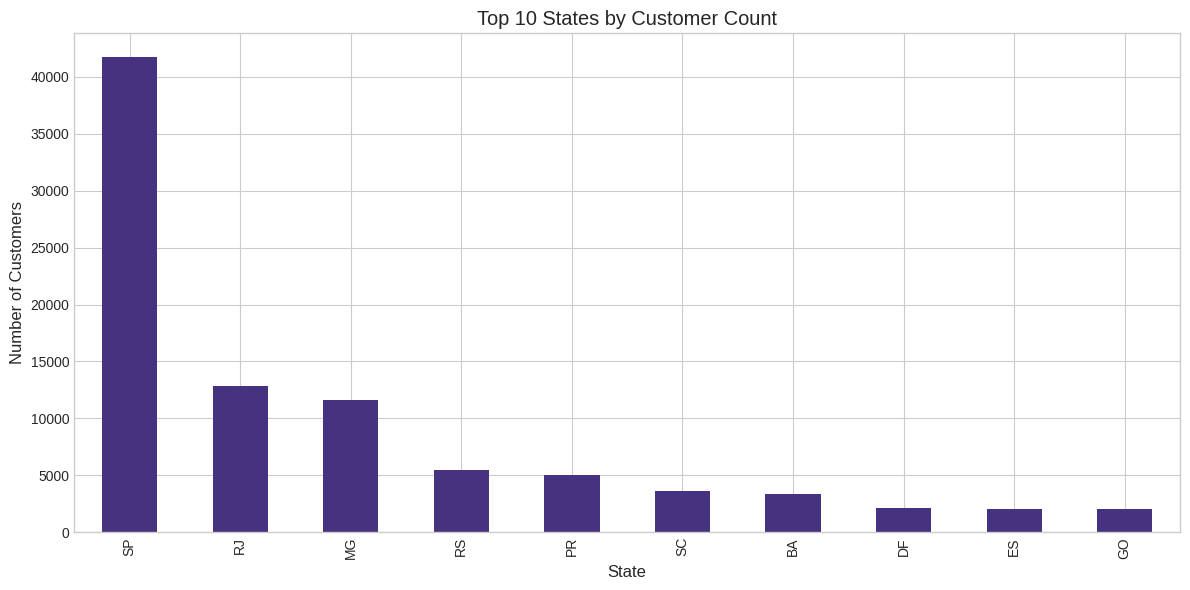

In [84]:
def customer_analysis(customers_df):
      print("\n" + "="*50)
      print("CUSTOMER ANALYSIS")
      print("="*50)

      customer_states = customers_df['customer_state'].value_counts()
      print("\nTop 5 States by Customer Count:")
      print(customer_states.head(5))

      plt.figure(figsize=(12, 6))
      customer_states[:10].plot(kind='bar')
      plt.title('Top 10 States by Customer Count')
      plt.xlabel('State')
      plt.ylabel('Number of Customers')
      plt.tight_layout()
      plt.savefig('customer_state_distribution.png')

customer_analysis(customers_ndf)

### Order Analysis


ORDER ANALYSIS

Order Status Distribution:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Monthly order trend chart saved as 'monthly_order_trend.png'

Order hour distribution chart saved as 'order_hour_distribution.png'


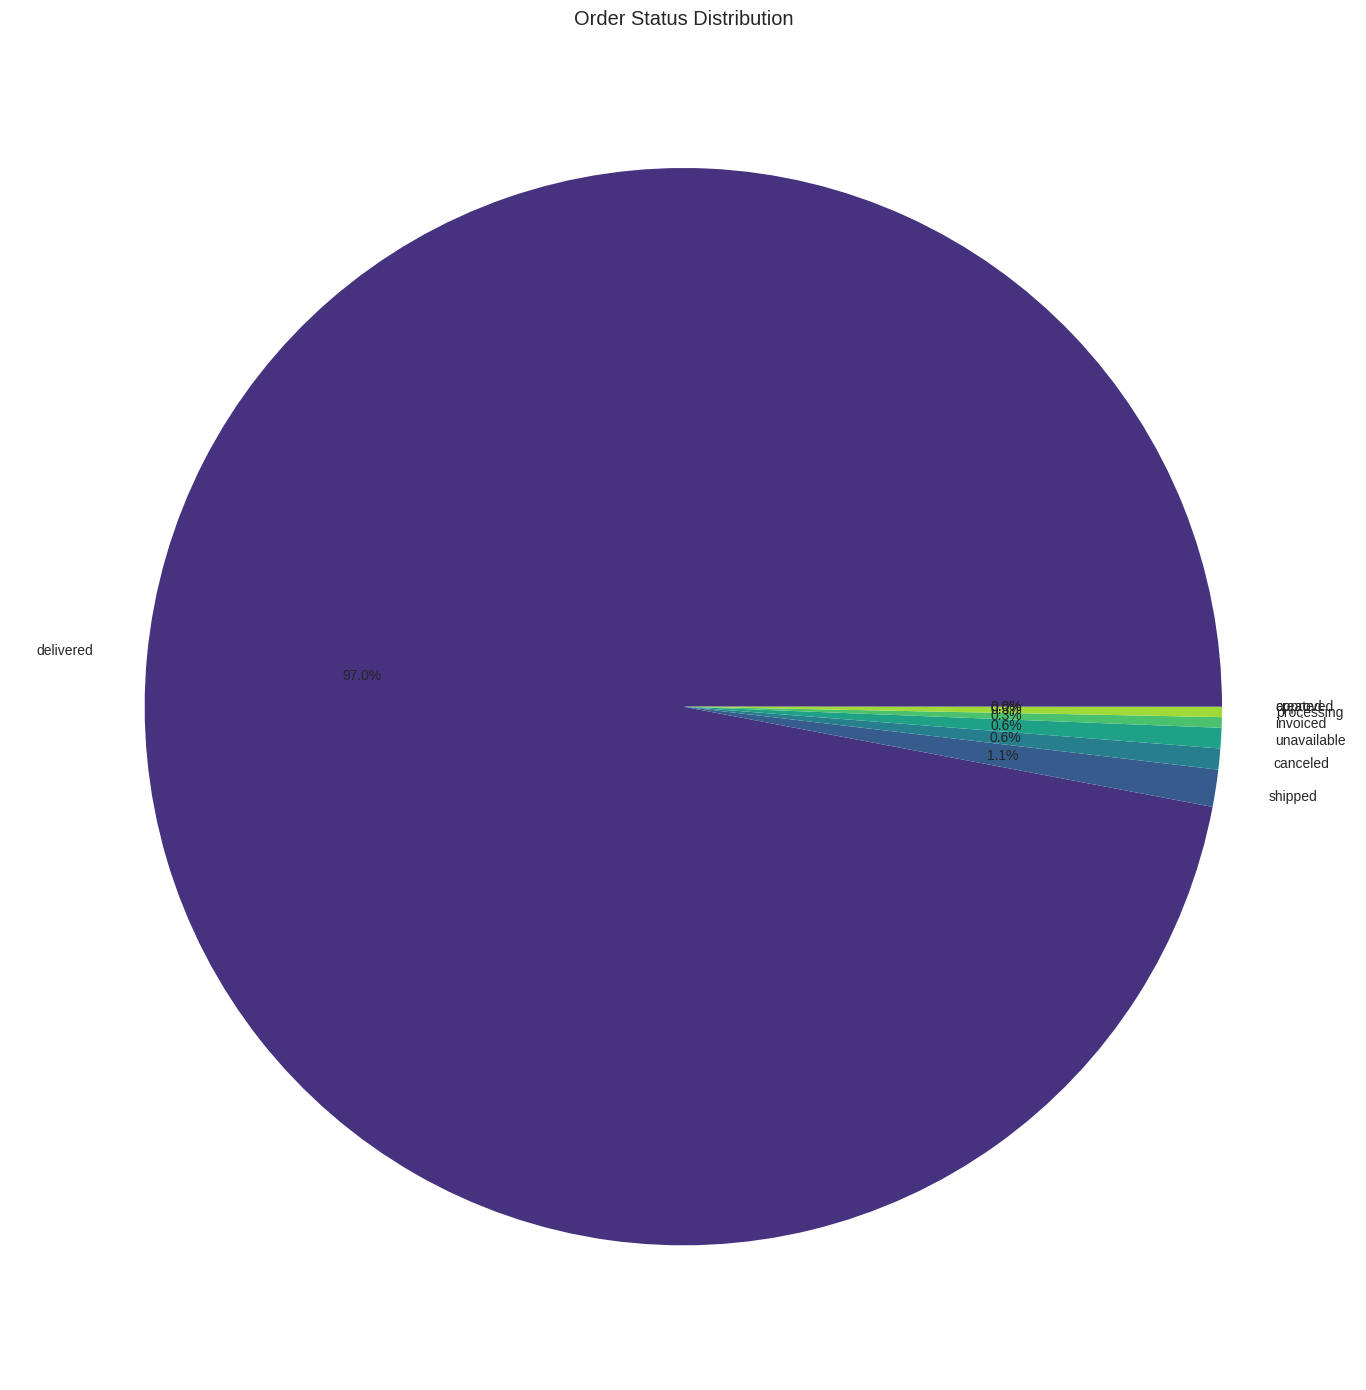

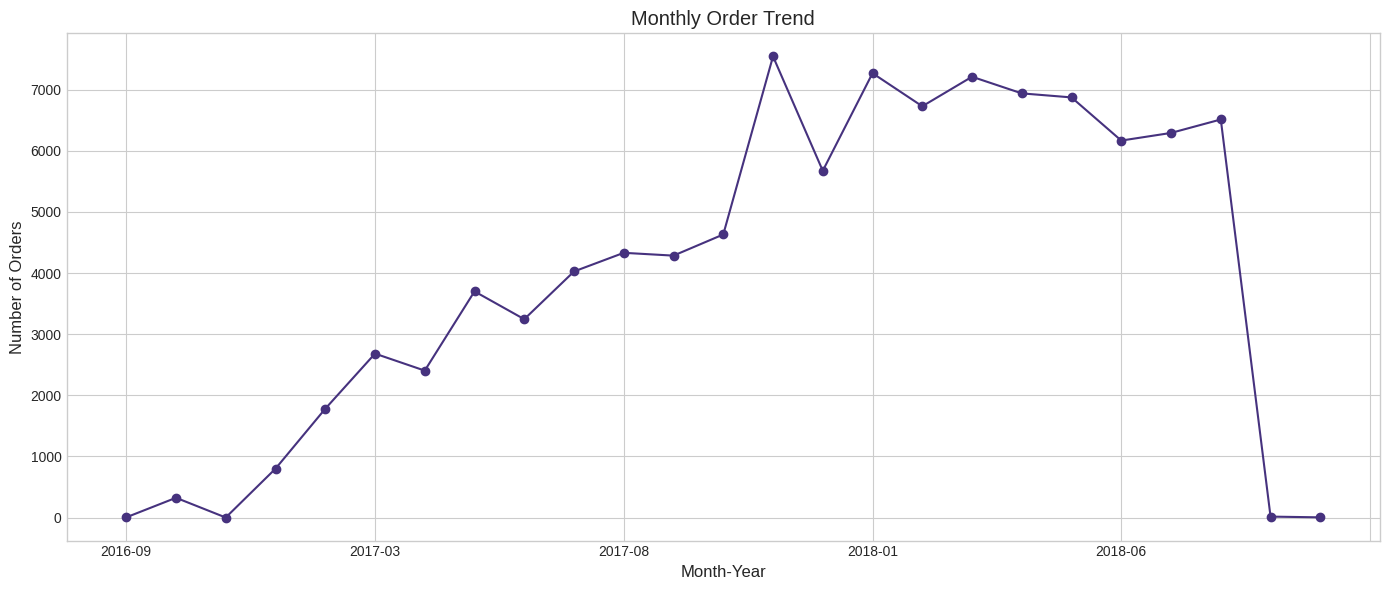

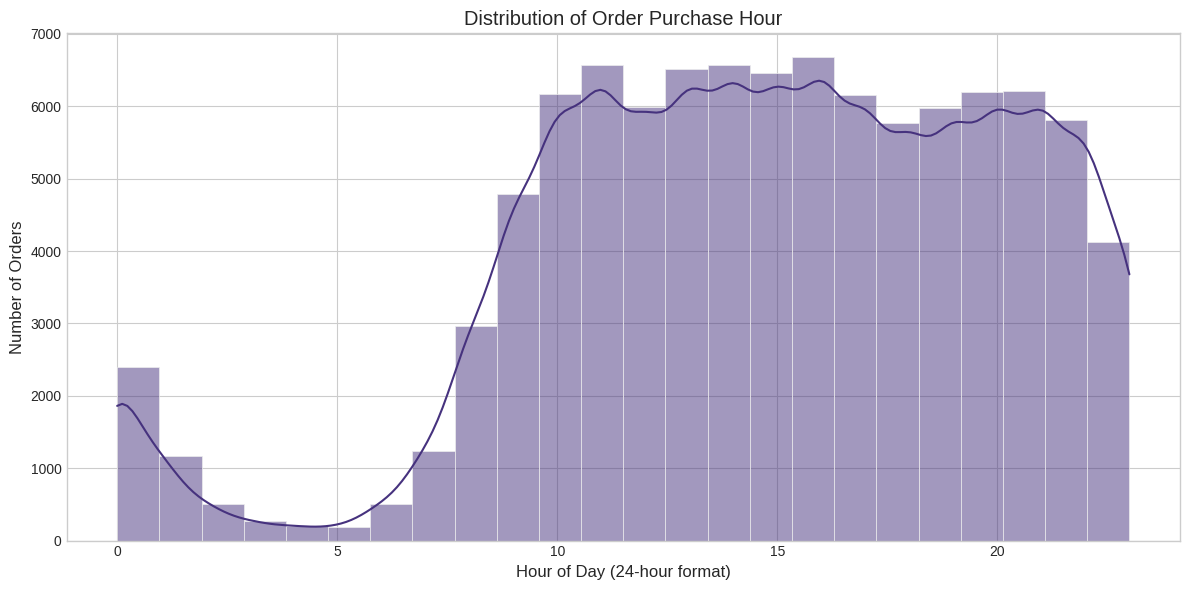

In [93]:
def order_analysis(orders_df):
      print("\n" + "="*50)
      print("ORDER ANALYSIS")
      print("="*50)

      order_status = orders_df['order_status'].value_counts()
      print("\nOrder Status Distribution:")
      print(order_status)

      plt.figure(figsize=(20, 14))
      order_status.plot(kind='pie', autopct='%1.1f%%')
      plt.title('Order Status Distribution')
      plt.ylabel('')
      plt.tight_layout()
      plt.savefig('order_status_distribution.png')

      # Mengurutkan beradasarkan bulan dan tahun
      orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'], errors='coerce')
      orders_df['month_year'] = orders_df['order_purchase_timestamp'].dt.strftime('%Y-%m')
      monthly_orders = orders_df.groupby('month_year').size()

      plt.figure(figsize=(14, 6))
      monthly_orders.plot(kind='line', marker='o')
      plt.title('Monthly Order Trend')
      plt.xlabel('Month-Year')
      plt.ylabel('Number of Orders')
      plt.grid(True)
      plt.tight_layout()
      plt.savefig('monthly_order_trend.png')
      print("\nMonthly order trend chart saved as 'monthly_order_trend.png'")

      # Mengurutkan distribusi pembelian order perjamnya
      plt.figure(figsize=(12, 6))
      orders_df['purchase_hour'] = orders_df['order_purchase_timestamp'].dt.hour
      sns.histplot(orders_df['purchase_hour'].dropna(), bins=24, kde=True)
      plt.title('Distribution of Order Purchase Hour')
      plt.xlabel('Hour of Day (24-hour format)')
      plt.ylabel('Number of Orders')
      plt.tight_layout()
      plt.savefig('order_hour_distribution.png')
      print("\nOrder hour distribution chart saved as 'order_hour_distribution.png'")

order_analysis(orders_ndf)

### Price Analysis


PRICE ANALYSIS

Product Price Statistics:
count    112650.000000
mean         98.444222
std          75.923244
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max         277.400000
Name: price, dtype: float64


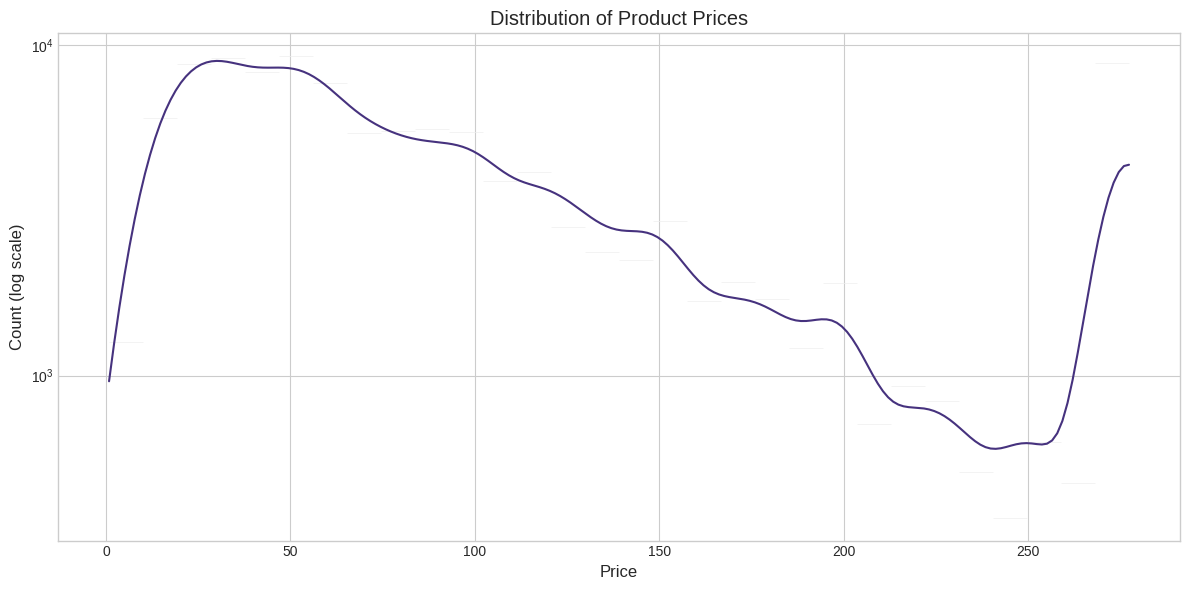

In [100]:
def price_analysis(order_items_df):
      print("\n" + "="*50)
      print("PRICE ANALYSIS")
      print("="*50)

      price_stats = order_items_df['price'].describe()
      print("\nProduct Price Statistics:")
      print(price_stats)

      plt.figure(figsize=(12, 6))
      sns.histplot(order_items_df['price'].dropna(), bins=30, kde=True, log_scale=(False, True))
      plt.title('Distribution of Product Prices')
      plt.xlabel('Price')
      plt.ylabel('Count (log scale)')
      plt.tight_layout()
      plt.savefig('price_distribution.png')

price_analysis(order_items_ndf)

**Insight VISUALIZATION & EXPLANATORY ANALYSIS(summary):**

- **Menganalisis dataset customer** untuk melihat korelasi antara state nya masing2 dengan total pembelian dari masing2 state
- **Menganalisis dataset orders** untuk melihat **distribusi status order** dan dapat disimpulkan kebanyakan barang sudah terdelivered, lalu kita bisa melihat **tren order bulanan** seperti apa, dan melihat **distribusi jam2** yang paling sering ato tidaknya seorang customer melakukan transaksi
- M**enganalisis dataset order items** untuk melihat **rentang distribusi harga** setiap customer bertransaksi

## Analisis Lanjutan (RFM & Geospatial Analysis)

### Pertanyaan 1: **Bagaimana pola pembelian pelanggan berdasarkan frekuensi transaksi? (RFM Analysis)**


RFM ANALYSIS PREVIEW

RFM Analysis Snapshot Date: 2018-10-18

RFM Metrics Summary Statistics:
       recency_days  frequency  monetary_value
count  96478.000000    96478.0    96478.000000
mean     289.284573        1.0      112.119255
std      152.836939        0.0       94.988871
min       50.000000        1.0        0.850000
25%      165.000000        1.0       45.900000
50%      270.000000        1.0       86.575000
75%      399.000000        1.0      149.900000
max      763.000000        1.0     2774.000000

RFM distributions chart saved as 'rfm_distributions.png'


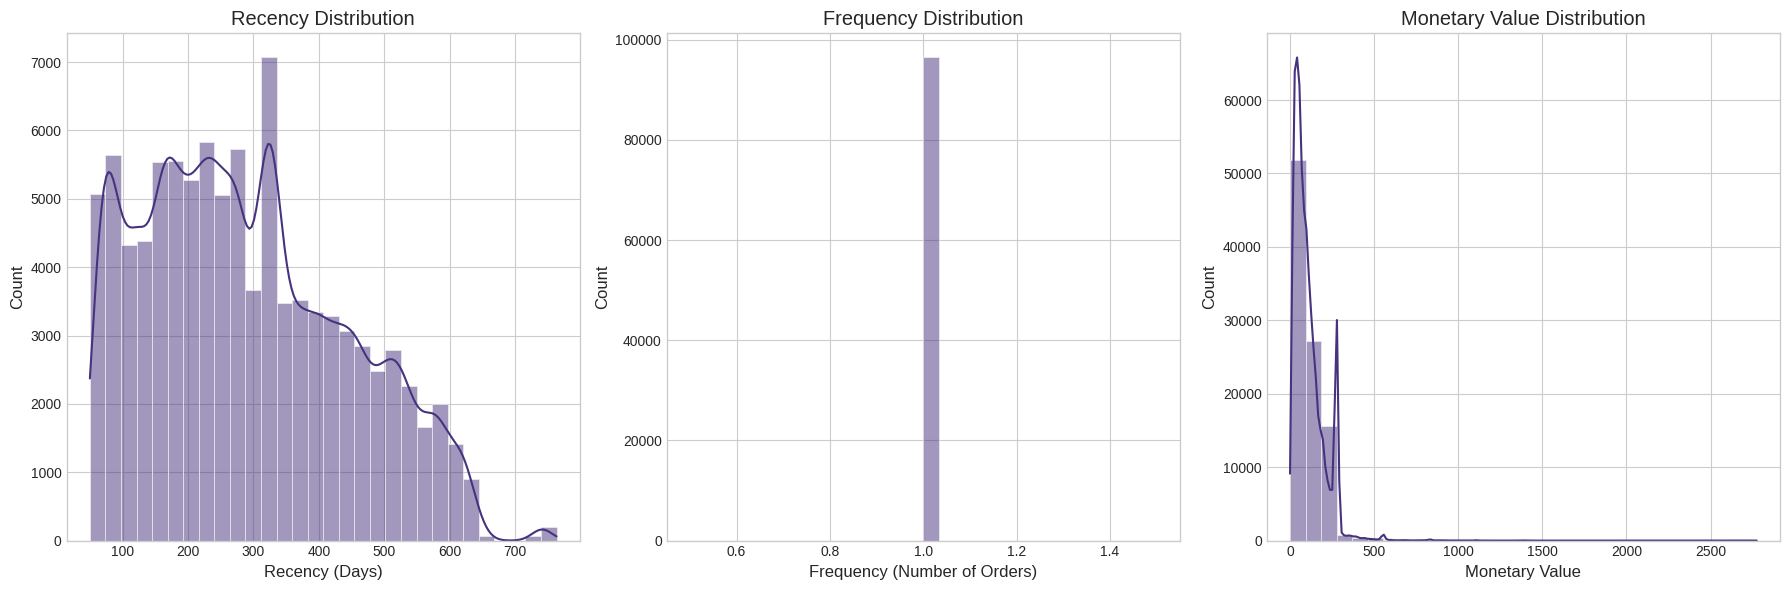

In [103]:
def rfm_analysis(orders_df, order_items_df):
      print("\n" + "="*50)
      print("RFM ANALYSIS PREVIEW")
      print("="*50)

      # Calculate analysis date (max date + 1 day)
      snapshot_date = orders_df['order_purchase_timestamp'].max() + timedelta(days=1)
      print(f"\nRFM Analysis Snapshot Date: {snapshot_date.date()}")

      # Merge orders and order_items for monetary calculation
      order_data = orders_df.merge(order_items_df, on='order_id')

      # Filter for completed orders only
      completed_orders = order_data[order_data['order_status'] == 'delivered']

      # Calculate simple RFM metrics
      rfm = completed_orders.groupby('customer_id').agg({
          'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency
          'order_id': pd.Series.nunique,  # Frequency
          'price': 'sum'  # Monetary
      }).reset_index()

      # Rename columns
      rfm.columns = ['customer_id', 'recency_days', 'frequency', 'monetary_value']

      # Display RFM summary statistics
      print("\nRFM Metrics Summary Statistics:")
      print(rfm.describe())

      # Visualize RFM distributions
      fig, axes = plt.subplots(1, 3, figsize=(18, 6))

      sns.histplot(rfm['recency_days'], bins=30, kde=True, ax=axes[0])
      axes[0].set_title('Recency Distribution')
      axes[0].set_xlabel('Recency (Days)')

      sns.histplot(rfm['frequency'], bins=30, kde=True, ax=axes[1])
      axes[1].set_title('Frequency Distribution')
      axes[1].set_xlabel('Frequency (Number of Orders)')

      sns.histplot(rfm['monetary_value'], bins=30, kde=True, ax=axes[2])
      axes[2].set_title('Monetary Value Distribution')
      axes[2].set_xlabel('Monetary Value')

      plt.tight_layout()
      plt.savefig('rfm_distributions.png')
      print("\nRFM distributions chart saved as 'rfm_distributions.png'")

rfm_analysis(orders_ndf, order_items_ndf)

**Insight Pertanyaan 1:**

- Disini saya melakukkan analisis RFM yang merupakan teknik buat menganalisis perilaku pelanggan berdasarkan tiga aspek utama: Recency (R), Frequency (F), dan Monetary (M). Recency ngukur seberapa baru pelanggan terakhir belanja, Frequency lihat seberapa sering mereka beli, dan Monetary hitung total uang yang mereka keluarkan.

- Metode ini digunakan untuk mengelompokan pelanggan, misalnya Best Customers (sering belanja, loyal, dan ngeluarin banyak uang) atau At-Risk Customers (sudah lama tidak melakukan transaksi). Dengan RFM, bisnis bisa bikin strategi pemasaran yang lebih tepat sasaran, seperti ngasih promo khusus buat pelanggan setia atau ngingetin pelanggan yang mulai jarang belanja

### Pertanyaan 2: **Bagaimana distribusi pesanan berdasarkan lokasi geografis? (Geospatial Analysis)**

In [114]:
def geospatial_analysis(customers_df):
        print("\n" + "="*50)
        print("GEOSPATIAL ANALYSIS PREVIEW")
        print("="*50)

        if 'customer_lat' in customers_df.columns and 'customer_lng' in customers_df.columns:
            customers_df['geometry'] = customers_df.apply(lambda row: Point(row['customer_lng'], row['customer_lat']), axis=1)
            gdf = gpd.GeoDataFrame(customers_df, geometry='geometry')

            world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

            fig, ax = plt.subplots(figsize=(12, 8))
            world.plot(ax=ax, color='lightgrey')
            df.plot(ax=ax, markersize=5, color='red', alpha=0.5)
            plt.title('Customer Geographical Distribution')
            plt.tight_layout()
            plt.savefig('customer_geospatial_distribution.png')

            print("Geospatial plot saved as customer_geospatial_distribution.png")
        else:
            print("Customer dataset does not contain latitude and longitude data.")

geospatial_analysis(customers_ndf)


GEOSPATIAL ANALYSIS PREVIEW
Customer dataset does not contain latitude and longitude data.



GEOSPATIAL ANALYSIS PREVIEW

Top 5 States by Order Count:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
dtype: int64


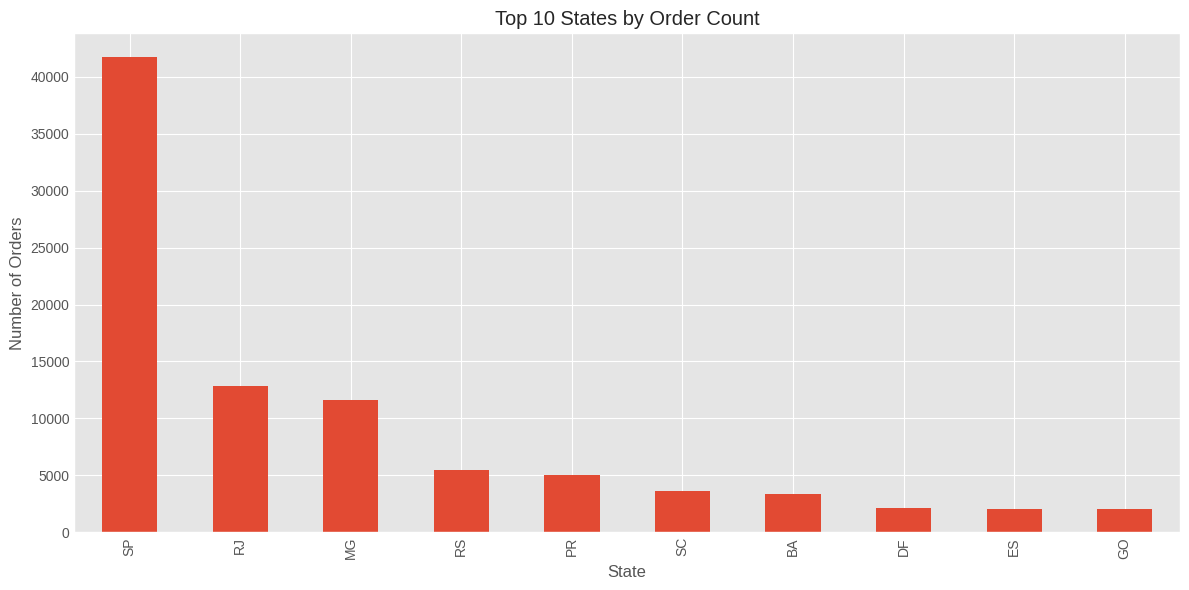

In [113]:
def geospatial_analysis(customers_df):
    print("\n" + "="*50)
    print("GEOSPATIAL ANALYSIS PREVIEW")
    print("="*50)

    # Jumah pesanan negara
    customer_order = orders_df.merge(customers_df, on='customer_id')
    state_orders = customer_order.groupby('customer_state').size().sort_values(ascending=False)

    print("\nTop 5 States by Order Count:")
    print(state_orders.head(5))

    plt.figure(figsize=(12, 6))
    state_orders[:10].plot(kind='bar')
    plt.title('Top 10 States by Order Count')
    plt.xlabel('State')
    plt.ylabel('Number of Orders')
    plt.tight_layout()
    plt.savefig('state_order_distribution.png')

geospatial_analysis(customers_ndf)

**Insight Pertanyaan 2:**

- Disini saya melakukkan **analisis geospatial** yang bisa digunkan untuk **melihat distribusi pesanan berdsarkan geografis**, disini seorang user atau orang bisnis bisa mengetahu kira2 **negara mana yang mempunya atau memesan barang paling banyak**

- Kemudian datanya akan **ditampilkan menggunakan peta disertai heatmap**, namun disini tidak bisa ditampilkan karena adanya keterbatasan, disini hanya bisa menampilkan chart pasive saja (tidak bisa interaktif seperti menggunakan streamlit). Tampilan analisis ini ada di streamlitnya

## Conclusion

KESIMPULAN SECARA KESELURUHAN

- **Data Loading dan Processing**                     
Proses pemuatan data dilakukan dengan menggunakan @st.cache_data untuk meningkatkan efisiensi dengan menyimpan data dalam cache. Dataset yang digunakan mencakup data pesanan dan item pesanan, di mana kolom tanggal dikonversi ke format datetime untuk analisis lebih lanjut. Selain itu, dilakukan perhitungan berbagai metrik yang diperlukan, termasuk pembuatan data RFM (Recency, Frequency, Monetary) dengan menggabungkan data pesanan dan item pesanan

- **Struktur Dashboard**                              
Dashboard ini memiliki tiga bagian utama: Overview, RFM Analysis, dan Geospatial Analysis. Navigasi dilakukan melalui sidebar, yang memungkinkan pengguna untuk dengan mudah beralih antarbagian dan mengeksplorasi berbagai analisis yang tersedia

- **Overview Section**                                
Bagian ini menyajikan metrik utama seperti total pelanggan, total pesanan, total pendapatan, dan rata-rata nilai pesanan. Selain itu, ditampilkan visualisasi distribusi status pesanan, tren pesanan bulanan, serta distribusi pelanggan berdasarkan negara bagian. Analisis ini memberikan gambaran umum tentang performa bisnis secara keseluruhan

- **RFM Analysis Section**                            
Bagian ini berfokus pada analisis RFM (Recency, Frequency, Monetary) untuk segmentasi pelanggan. Ditampilkan ringkasan metrik rata-rata recency, frequency, dan monetary value, serta visualisasi distribusi segmen pelanggan. Selain itu, terdapat tabel perbandingan metrik antar segmen dan visualisasi 3D untuk analisis lebih mendalam terhadap segmen pelanggan tertentu.

- **Geospatial Analysis Section**                     
Analisis geospasial menampilkan distribusi pesanan berdasarkan negara bagian dalam bentuk visualisasi grafis. Selain itu, terdapat peta interaktif dengan heat map yang menunjukkan kepadatan pesanan di berbagai wilayah. Bagian ini juga menyajikan daftar kota dengan jumlah pesanan terbanyak, yang berguna untuk memahami pola geografis dalam bisnis.

- **Fitur Analitik Utama**                            
Dashboard ini menawarkan berbagai fitur analitik utama, seperti segmentasi pelanggan berbasis RFM, analisis distribusi geografis pesanan dan pelanggan, serta analisis tren pesanan dalam bentuk time series. Selain itu, terdapat fitur perbandingan segmen pelanggan, yang dapat digunakan untuk menyusun strategi pemasaran yang lebih terarah dan efektif. Dengan analisis ini, bisnis dapat lebih memahami perilaku pelanggan dan mengoptimalkan strategi penjualan mereka

KESIMPULAN UNTUK MENJAWAB 2 PERTANYAAN BISNIS

- Pertama selain ada analysis RFM dan geospatial, user bisa **memanfaatkan dashboard** ini untuk **melihat analisis data secara singkat** mengenai informasi penting yang ada daam E-commerce ini

- **Pertanyaan 1 :** seorang user bisnis bisa mengetahui pola pembelian pelanggan terhadap frekuensi pembelianya dengan melakukan segmentasi tipe pelanggan, dan semua itu dihitung menggunakan RFM. Metode ini digunakan untuk mengelompokan pelanggan, misalnya Best Customers (sering belanja, loyal, dan ngeluarin banyak uang) atau At-Risk Customers (sudah lama tidak melakukan transaksi). Dengan RFM, bisnis bisa bikin strategi pemasaran yang lebih tepat sasaran, seperti ngasih promo khusus buat pelanggan setia atau ngingetin pelanggan yang mulai jarang belanja

- **Pertanyaan 2 :** **analisis geospatial** bisa digunkan untuk **melihat distribusi pesanan berdsarkan geografis**, disini seorang user atau orang bisnis bisa mengetahu kira2 **negara mana yang mempunya atau memesan barang paling banyak** dan bisa meningkatkan pasarnya di negara2 yang sering membeli produknya